In [127]:
import numpy as np 
import pandas as pd 


In [128]:
headers =  ['age', 'sex','chest_pain','resting_blood_pressure',  
        'serum_cholestoral', 'fasting_blood_sugar', 'resting_ecg_results',
        'max_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',"slope of the peak",
        'num_of_major_vessels','thal', 'heart_disease']

In [129]:
data=pd.read_csv('heart.dat',sep=' ',names=headers)

In [130]:
data

,age,sex,chest_pain,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_ecg_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope of the peak,num_of_major_vessels,thal,heart_disease
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


In [131]:
data.isna().sum()

age                        0
sex                        0
chest_pain                 0
resting_blood_pressure     0
serum_cholestoral          0
fasting_blood_sugar        0
resting_ecg_results        0
max_heart_rate_achieved    0
exercise_induced_angina    0
oldpeak                    0
slope of the peak          0
num_of_major_vessels       0
thal                       0
heart_disease              0
dtype: int64

In [132]:
data["heart_disease"]=data["heart_disease"].replace(1,0)
data["heart_disease"]=data["heart_disease"].replace(2,1)


In [133]:
data.shape

(270, 14)

In [134]:
X = np.array(data.drop(columns=['heart_disease']))
y_label = np.array(data['heart_disease'].values.reshape(X.shape[0], 1))

In [135]:
X.shape,y_label.shape

((270, 13), (270, 1))

In [136]:
X

array([[70.,  1.,  4., ...,  2.,  3.,  3.],
       [67.,  0.,  3., ...,  2.,  0.,  7.],
       [57.,  1.,  2., ...,  1.,  0.,  7.],
       ...,
       [56.,  0.,  2., ...,  2.,  0.,  3.],
       [57.,  1.,  4., ...,  2.,  0.,  6.],
       [67.,  1.,  4., ...,  2.,  3.,  3.]])

In [137]:
X_test,X_train=np.split(X,[89],axis=0)
X_test,X_train=X_test.T,X_train.T
X_train.shape

(13, 181)

In [138]:
y_test,y_train=np.split(y_label,[89],axis=0)
y_test,y_train=y_test.T,y_train.T
y_test.shape,X_test.shape

((1, 89), (13, 89))

In [139]:
def sigmoid(Z):
    return(np.divide(1,(1+np.exp(-Z))))

In [140]:
def relu(Z):
    return(np.maximum(0.01,Z*0.01))

In [141]:
def initialise_params(n_l,n_pl):
    W=np.random.randn(n_l,n_pl) * 0.2
    b=np.random.randn(n_l,1) *0.2
    return W,b

In [142]:
W1,b1=initialise_params(4,13)
W2,b2=initialise_params(3,4)
W3,b3=initialise_params(1,3)
W1.shape,X_train.shape,X_train
m=X_train.shape[0]

In [143]:
def forward_prop(W,b,A_prev,activation="relu"):
    Z=np.dot(W,A_prev)+b
    if activation=="relu":
        A=relu(Z)
    elif activation =="sigmoid":
        A=sigmoid(Z)
    else:
        return "Invalid"
    return A

In [144]:
def cost(A,Y,m):
    return np.sum(np.multiply(Y,np.log(A))+np.multiply(np.add(1,-Y),np.log(1-A)))/-m 

In [145]:
def back_neuron(dZ,A,W):
    dA_prev=np.dot(W.T,dZ)
    dW=np.sum(np.dot(dZ,A.T),axis=0)
    db=np.sum(dZ,axis=0)
    return dA_prev,dW,db

In [146]:
def dRelu(A):
    A[A>=0]=1
    A[A<0]=0
    return A

In [147]:
def dSigmoid(A):
    return np.multiply(A,1-A)


In [148]:
def dCost(y,yhat):
    return -(np.divide(y,yhat) - np.divide(1-y,1-yhat))
    

In [149]:
dA3s=[]
def Layerback(y,yhat,cache,X):
    dA3=dCost(y,yhat)
    dA3s.append(dA3)
    dZ3=dA3*dSigmoid(yhat)
    #print(dZ3)
    dA2,dW3,db3=back_neuron(dZ3,cache["A2"],cache["W3"])
    dZ2=dA2*dRelu(cache["A2"])
    dA1,dW2,db2=back_neuron(dZ2,cache["A1"],cache["W2"])
    #print(dW2)
    dZ1=dA1 * dRelu(A1)
    _,dW1,db1=back_neuron(dZ1,X,cache["W1"])
    return dW1,db1,dW2,db2,dW3,db3


In [150]:
W1,b1=initialise_params(4,13)
W2,b2=initialise_params(3,4)
W3,b3=initialise_params(1,3)

In [160]:

alpha=0.01
costs=[]
cache={}
A3s=[]
Accuracy=[]
for i in range(300):
    A1=forward_prop(W1,b1,X_train)
    A2=forward_prop(W2,b2,A1)
    A3=forward_prop(W3,b3,A2,activation="sigmoid")
   # print(A3)
    costs.append(cost(A3,y_train,y_train.shape[1]))
    Accuracy.append(np.abs(np.sum((y_train-A3)/y_train.shape[1])))
    cache["W1"]=W1
    cache["W2"]=W2
    cache["W3"]=W3
    cache["A1"]=A1
    cache["A2"]=A2
    dW1,db1,dW2,db2,dW3,db3=Layerback(y_train,A3,cache,X_train)
    W1=W1-dW1*alpha
    b1=b1-db1*alpha
    W2=W2-dW2*alpha
    b2=b2-db2*alpha
    W3=W3-dW3*alpha
    b3=b3-db3*alpha

In [161]:
from matplotlib import pyplot as plt 

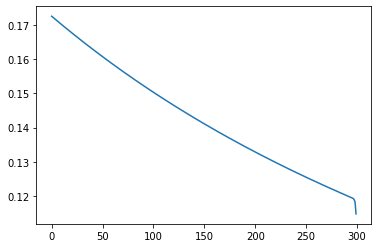

In [162]:
plt.plot(costs)


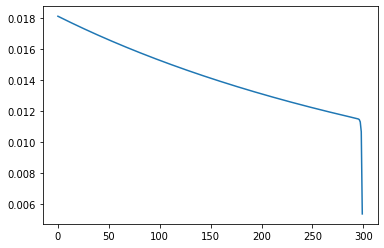

In [163]:
plt.plot(Accuracy)

In [155]:
A3

array([[0.76141401, 0.27179567, 0.76141401, 0.76141401, 0.76141401,
        0.76141401, 0.76141401, 0.27179567, 0.76141401, 0.27179567,
        0.27179567, 0.27179567, 0.76141401, 0.27179567, 0.76141401,
        0.76141401, 0.76141401, 0.27179567, 0.76141401, 0.76141401,
        0.27179567, 0.76141401, 0.27179567, 0.76141401, 0.27179567,
        0.27179567, 0.27179567, 0.76141401, 0.76141401, 0.27179567,
        0.76141401, 0.76141401, 0.76141401, 0.76141401, 0.27179567,
        0.27179567, 0.27179567, 0.76141401, 0.27179567, 0.27179567,
        0.76141401, 0.76141401, 0.76141401, 0.27179567, 0.76141401,
        0.27179567, 0.27179567, 0.27179567, 0.76141401, 0.27179567,
        0.27179567, 0.76141401, 0.27179567, 0.76141401, 0.27179567,
        0.76141401, 0.76141401, 0.76141401, 0.76141401, 0.76141401,
        0.27179567, 0.27179567, 0.27179567, 0.27179567, 0.27179567,
        0.27179567, 0.27179567, 0.76141401, 0.27179567, 0.27179567,
        0.76141401, 0.76141401, 0.76141401, 0.27